## Learning Curves and Validation Curves

**Learning Curve** and **Validation Curve** are two very useful simple diagnostic tools that help us debug issues with ML algorithms. **Learning Curves** can be used to debug bias vs variance problems with the algorithm. **Learning curves** are a plot of model accuracy as a function of data points. Usually we draw two **Learning curves** one for training set one for test set. Typically we encounter one of these situations while looking at learning curves:
1. Both the **Learning curves** have low accuracy then we can generally conclude model has **high bias** or is underfitting. 
2. Training **Learning curve** has high accuracy and test has low accuracy then we can conclude model is overfitted or has **high variance**.
3. Both training **Learning curve** and test **Learning curve** has high accuracy. Then the model is appropriately fitted.

Below we will use sklearn to draw learning curves.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Make the sheet width 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>" ))

In [3]:
#import iris dataset
from sklearn import datasets

iris = datasets.load_iris()
#load only two features
X = iris.data[:,[2,3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_test:', np.bincount(y_test))
print('Labels counts in y_train:', np.bincount(y_train))

Labels counts in y: [50 50 50]
Labels counts in y_test: [10 10 10]
Labels counts in y_train: [40 40 40]


In [5]:
#Lets first build a pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

#Pipeline with high level of regularization
pipe_lr_high_regularization = make_pipeline(StandardScaler(),
                       LogisticRegression(random_state=1, solver='lbfgs', C=1e-4))

#Pipeline with low level of regularization
pipe_lr_low_regularization = make_pipeline(StandardScaler(),
                       LogisticRegression(random_state=1, solver='lbfgs', C=1e4))

#Pipeline with appropriate level of regularization
pipe_lr_good_regularization = make_pipeline(StandardScaler(),
                       LogisticRegression(random_state=1, solver='lbfgs', C=5))

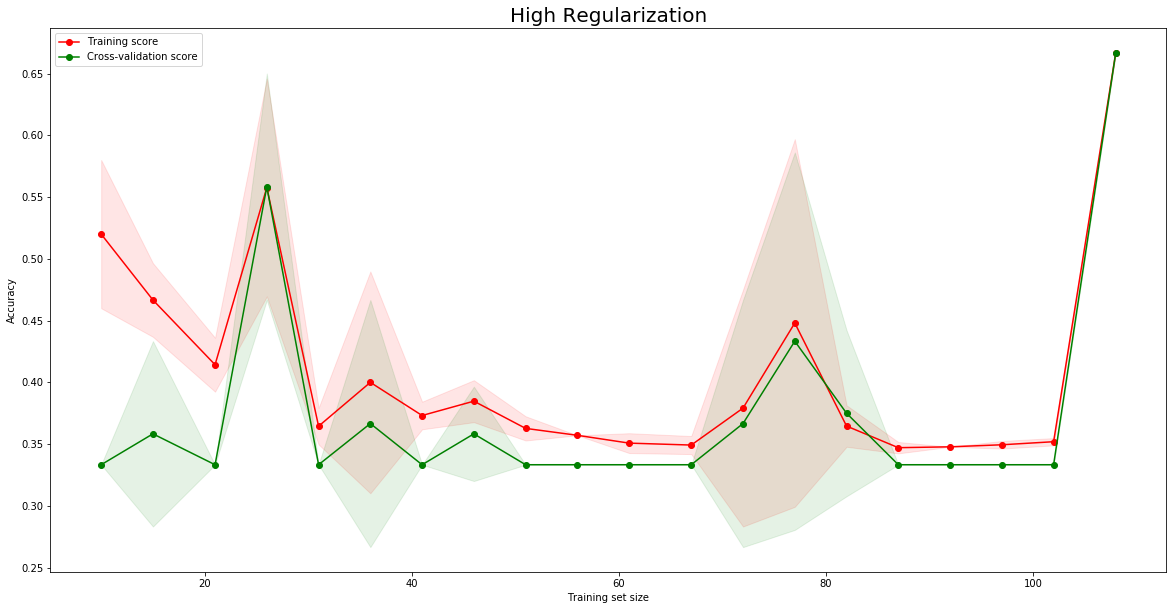

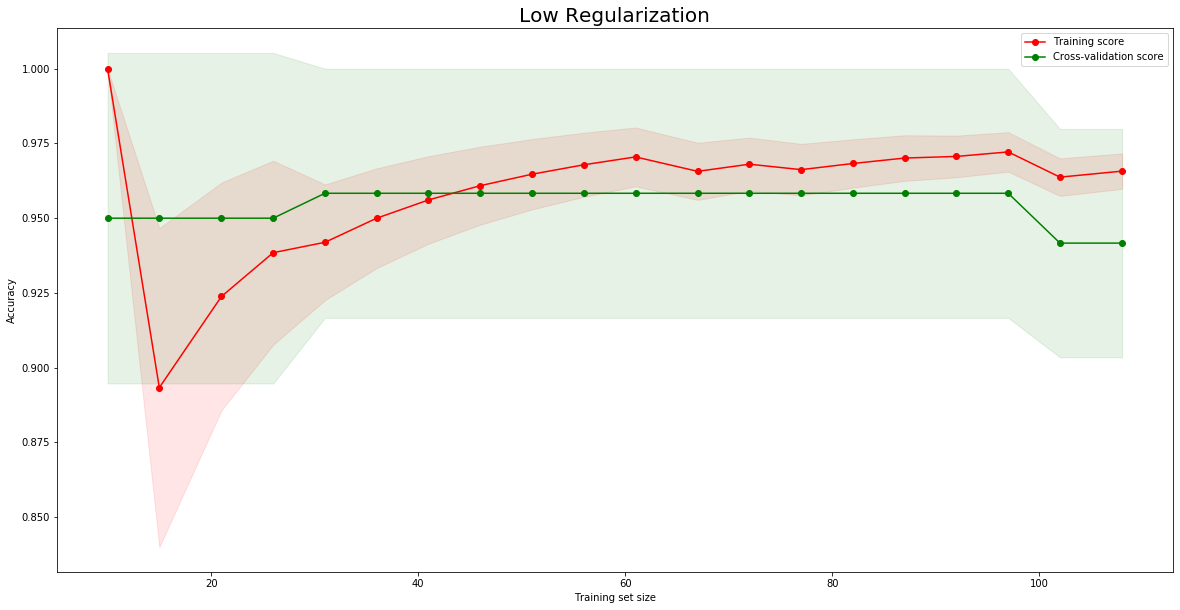

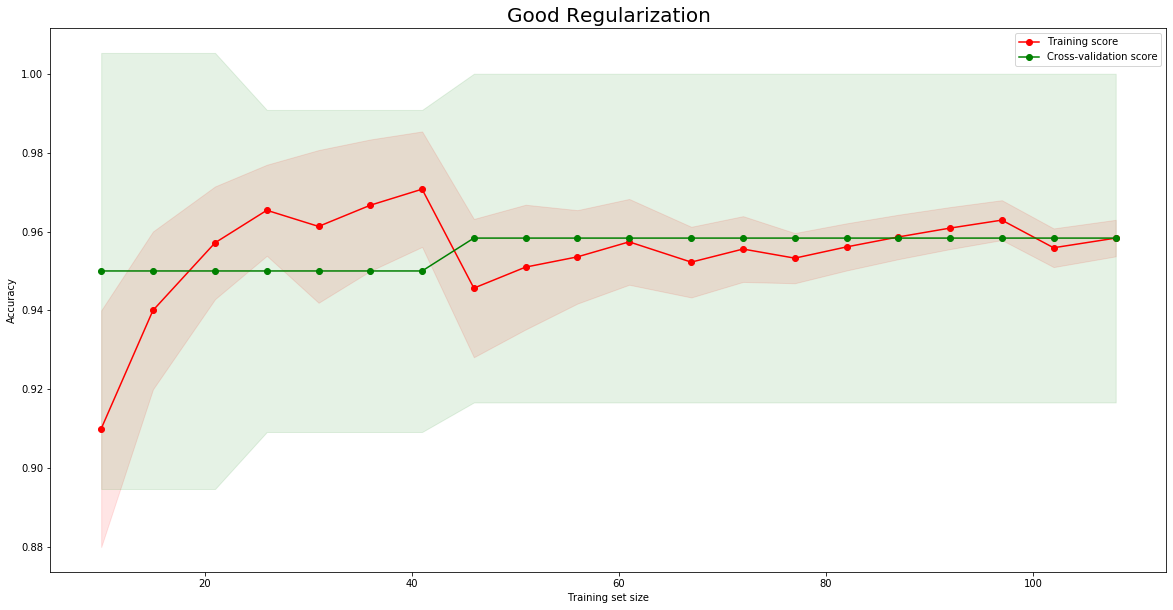

In [25]:
from sklearn.model_selection import learning_curve

def plotLearningCurve(pipeline, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline,
                                                            X = X,
                                                            y = y,
                                                           train_sizes=np.linspace(0.1, 1.0, 20),
                                                           cv = 10)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(20,10))
    plt.title(title, fontsize=20)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std, alpha=0.1,
        color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std, alpha=0.1,
        color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
        label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
        label="Cross-validation score")
    plt.xlabel('Training set size')
    plt.ylabel('Accuracy')
    plt.legend()
    
plotLearningCurve(pipe_lr_high_regularization, X_train, y_train, 'High Regularization')
plotLearningCurve(pipe_lr_low_regularization, X_train, y_train, 'Low Regularization')
plotLearningCurve(pipe_lr_good_regularization, X_train, y_train, 'Good Regularization')

We can see from plots above when we have **very high** regularization, model has **high bias** and both train and test set have low accuracy. When we have **very low** regularization model has **high variance** train set has lower error than test set. When we have **appropriate** regularization both test and train set have **good accuracy**.

### Validation curves


**Validation curves** are similar to learning curves, but now we plot training and test errors as a function of regularization parameters. Below is an example of generating a **Validation curve** using sklearn.

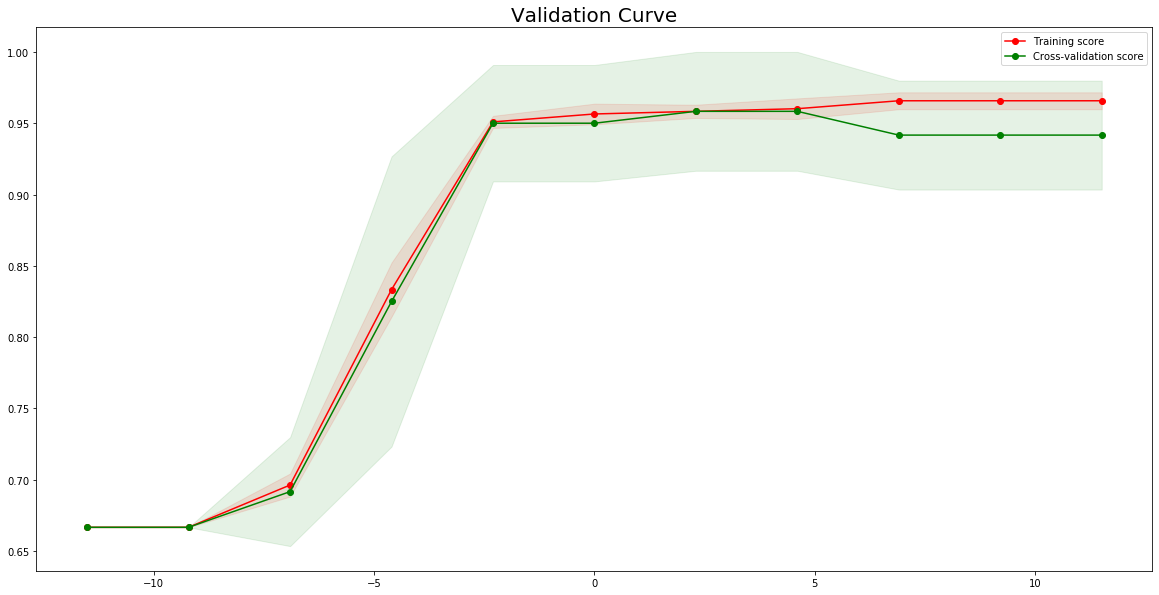

In [24]:
from sklearn.model_selection import validation_curve
param_range = np.logspace(-5,5,11)
train_scores, test_scores = validation_curve(estimator=pipe_lr_good_regularization, 
                                            X=X_train,
                                            y=y_train,
                                            param_name='logisticregression__C',
                                            param_range=param_range,
                                            cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(20,10))
plt.title('Validation Curve', fontsize=20)
plt.fill_between(np.log(param_range), train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std, alpha=0.1,
    color="r")
plt.fill_between(np.log(param_range), test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std, alpha=0.1,
    color="g")
plt.plot(np.log(param_range), train_scores_mean, 'o-', color="r",
    label="Training score")
plt.plot(np.log(param_range), test_scores_mean, 'o-', color="g",
    label="Cross-validation score")
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.legend()
    

#### From the above we can see train set accuracy keeps on going up as we increase C. But test set accuracy peaks with C = 5.